# **Week 5 -  Hypothesis Testing**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

## **Exercise 3.3 Concrete items (hypothesis testing)**

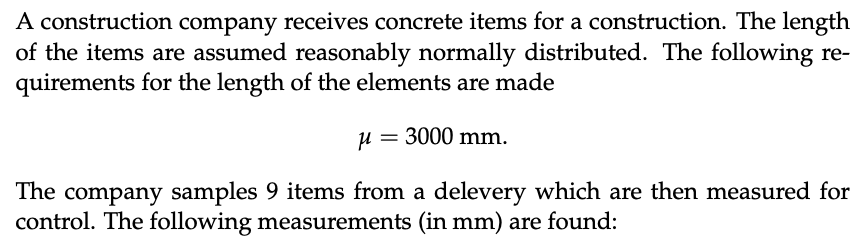

### **a) Evidence against $H_0$**

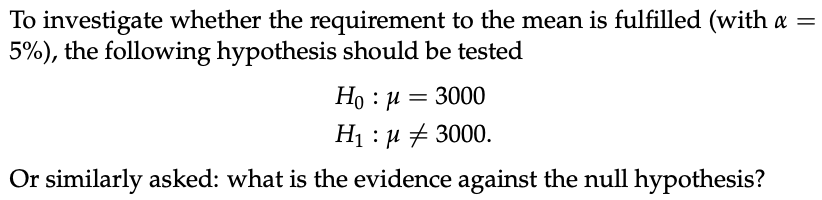

In [3]:
samples = np.array([3003, 3005, 2997, 3006, 2999, 2998, 3007, 3005, 3001])

We use method 3.23:

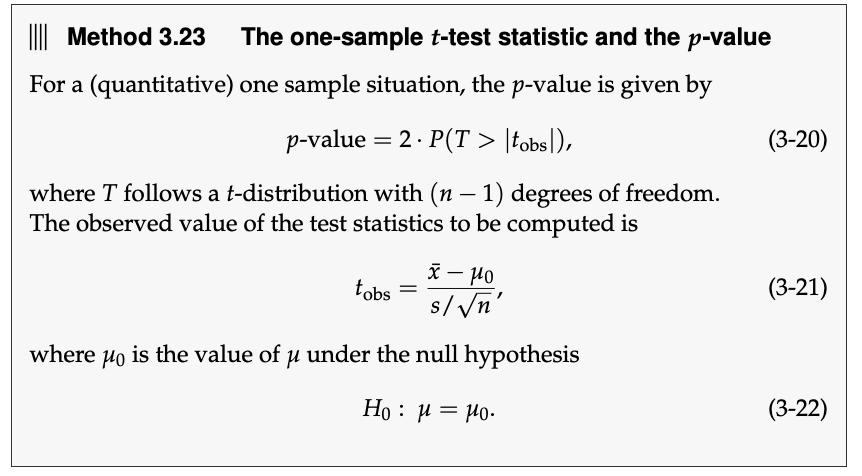

In [4]:
# method 3.23
n = len(samples)
mu_0 = 3000
tobs = (np.mean(samples) - mu_0) / (np.std(samples, ddof=1) / np.sqrt(n))
print(f"tobs: {tobs}")

# the p-value is the probability of observing a
# test statistic as extreme as the one computed from the sample:
pvalue = 2 * (1 - stats.t.cdf(abs(tobs), df=n-1))
print(f"p-value: {pvalue}")

tobs: 1.8877596148972005
p-value: 0.09575551807233929


In [5]:
# or with the built-in function
tobs, p_value = stats.ttest_1samp(samples, popmean=3000)
print(f"t-statistic: {tobs}\np-value: {p_value}")

t-statistic: 1.8877596148972005
p-value: 0.09575551807233935


Since the p-value is greater than our alpha value of $\alpha=0.05$, there is little or no evidence against H0, so we fail to reject $H_0$.

### **b) Critical Values for $\alpha=0.01$**

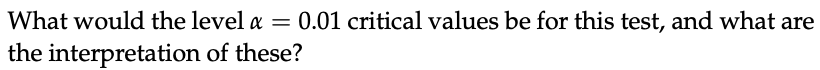

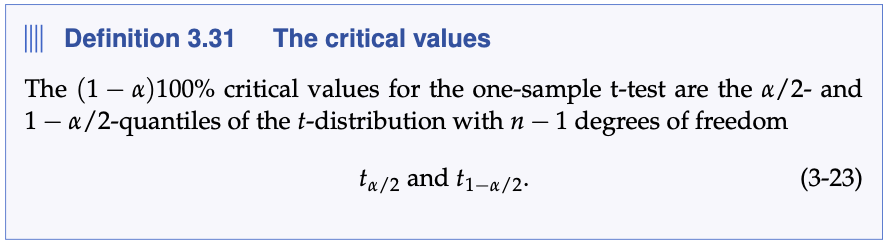

In [6]:
# the quantile is 1 - alpha/2, so we have
alpha = 0.01
quantile = 1 - alpha / 2
print(f"Quantile: {quantile}")

# the critical values would be plus minus t_0.995:
critical_value = stats.t.ppf(quantile, df=n-1)
print(f"Critical value (t_0.995): ±{critical_value}")

Quantile: 0.995
Critical value (t_0.995): ±3.3553873313333957


This means that, in a new experiment, the standardized difference between the data and the null hypothesis, also called $t_{obs}$, must be either larger than 3.355 or smaller than −3.355 to lead to a significant result of the experiment.

### **c) Critical Values for $\alpha=0.05$**

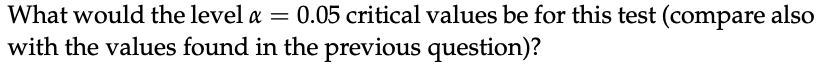

In [7]:
# the quantile is 1 - alpha/2, so we have
alpha = 0.05
quantile = 1 - alpha / 2
print(f"Quantile: {quantile}")

# the critical values would be:
critical_value = stats.t.ppf(quantile, df=n-1)
print(f"Critical value (t_0.995): ±{critical_value}")

Quantile: 0.975
Critical value (t_0.995): ±2.3060041350333704


This means that, again in a new experiment, it is easier to detect an effect with significance level $α = 0.05$ than on level $α = 0.01$.

### **d) Normality Assumption**

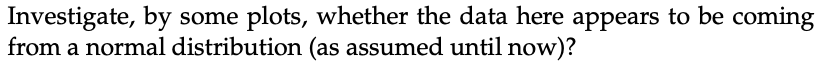

We plot the histogram first:

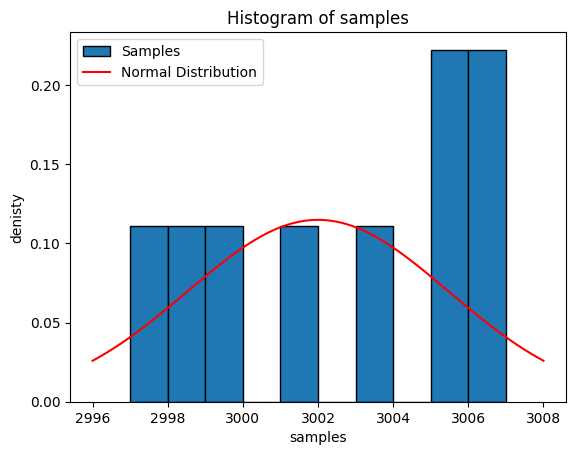

In [8]:
#plot histogram

plt.hist(samples, edgecolor='black', density=True, label='Samples')
plt.xlabel('samples')
plt.ylabel('denisty')
plt.title('Histogram of samples')

#add normal distribution
x = np.linspace(2996, 3008, 500)
y = stats.norm.pdf(x, loc=np.mean(x), scale=np.std(x, ddof=1))
plt.plot(x, y, label='Normal Distribution', color='red')
plt.legend()
plt.show()


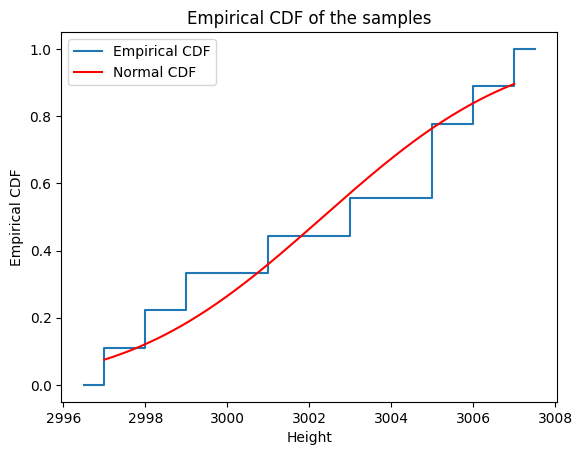

In [9]:
# Plot the empirical cdf
ecdf = stats.ecdf(samples)
ax = plt.subplot()
ecdf.cdf.plot(ax, label='Empirical CDF')
ax.set(xlabel='Height', ylabel='Empirical CDF')

# Plot a normal cdf
y = np.linspace(min(samples),max(samples), 1000)
plt.plot(y,stats.norm.cdf(y,loc=samples.mean(),
scale=samples.std(ddof=1)),color="red", label="Normal CDF")
plt.legend()
plt.title("Empirical CDF of the samples")
plt.show()

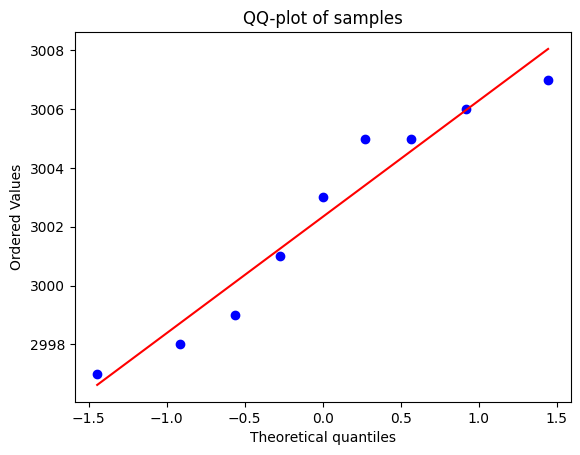

In [ ]:
stats.probplot(samples, plot=plt)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.title('QQ-plot of samples')
plt.show()

It is hard to tell with only 9 samples, but they seem to be following the Q-Q line.

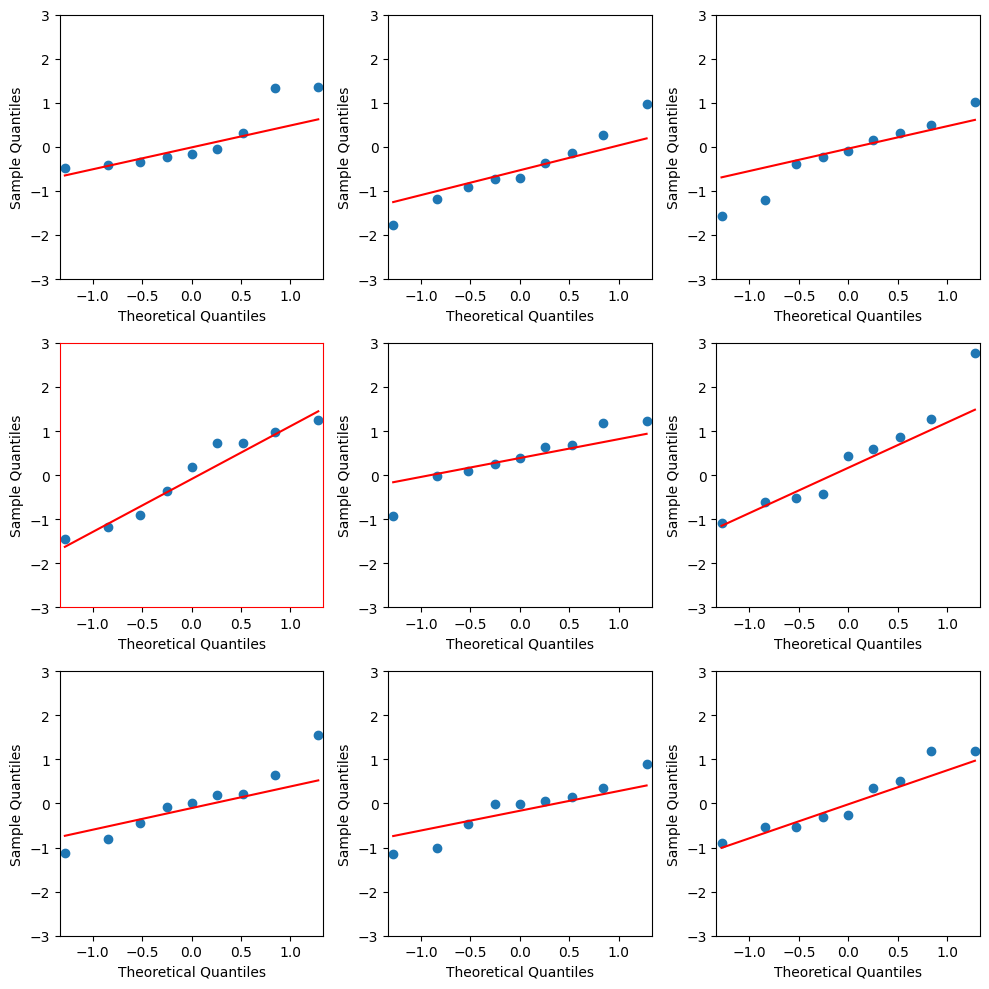

In [11]:
# Generate 9 plots with QQ-plots from the assumed distribution

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Generate random plot coordinates to replace with data QQ plot
W = stats.randint.rvs(0, 3, size=2)

# Create 9 random QQ plots
for ax in axs.flat:
    sm.qqplot(stats.norm.rvs(size=n), line="q", ax=ax)
    ax.set_ylim([-3, 3])

# Clear the randomly selected plot and replace with the plot from the sample data
axs[W[0], W[1]].clear()
sm.qqplot((samples - np.mean(samples)) / np.std(samples, ddof=1), line="q", ax=axs[W[0], W[1]])  # Standardized
axs[W[0], W[1]].set_ylim([-3, 3])

# Highlight the replaced plot with red spines
plt.setp(axs[W[0], W[1]].spines.values(), color="red")

# Generate the plot
plt.tight_layout()
plt.show()


The real QQ-plot seem to look similar to the QQ-plots from the simulated normal data.

### **e) QQ-Plot**

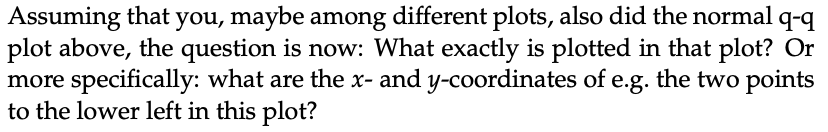

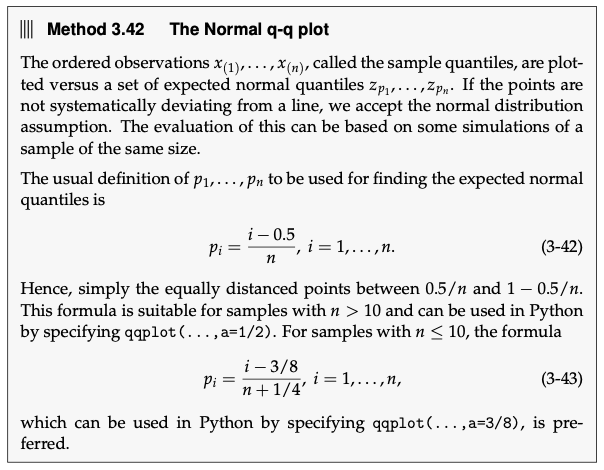

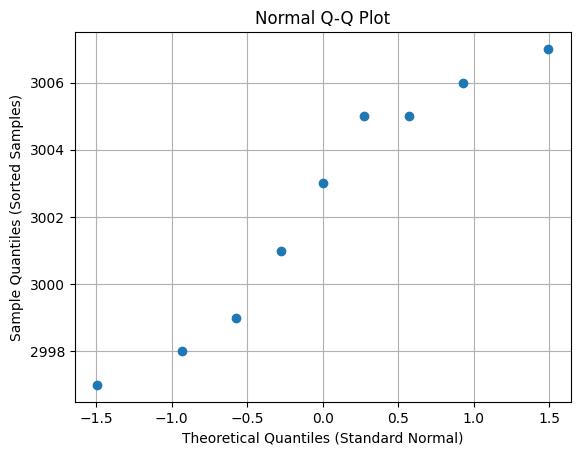

In [12]:
# Sort the data (these are the y-coordinates)
sorted_samples = np.sort(samples)

# Calculate the p-values using the formula: p_i = (i - 3/8) / (n + 1/4), where i is the index
n = len(samples)
p_is = [(i - 3/8) / (n + 1/4) for i in range(1, n + 1)]

# Calculate the quantiles from the standard normal distribution (x-coordinates)
qnorm_values = stats.norm.ppf(p_is)

# Plot the quantiles vs sorted samples
plt.plot(qnorm_values, sorted_samples, 'o')
plt.xlabel("Theoretical Quantiles (Standard Normal)")
plt.ylabel("Sample Quantiles (Sorted Samples)")
plt.title("Normal Q-Q Plot")
plt.grid(True)
plt.show()


## **Exercise 3.4 Aluminum profile (hypothesis testing)**

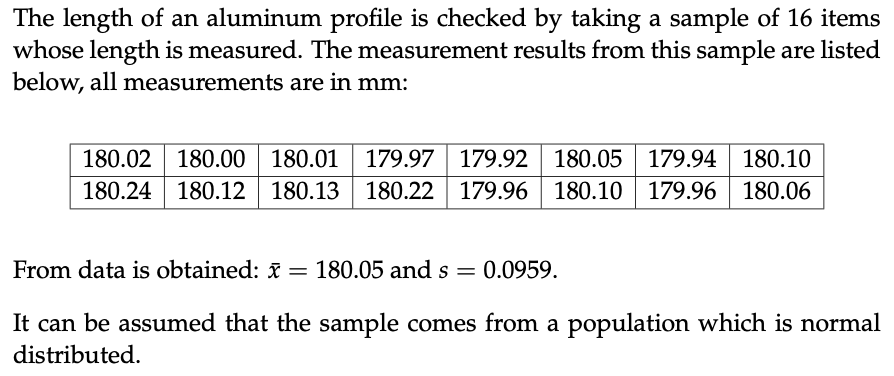

In [13]:
samples = np.array([180.02, 180.00, 180.01, 179.97, 179.92, 
                    180.05, 179.94,180.10,180.24, 180.12,
                    180.13, 180.22, 179.96, 180.10, 179.96, 180.06])


### **a) Evidence against $H_0$**

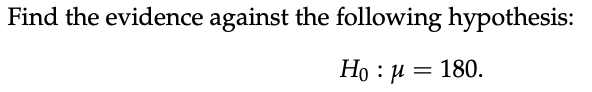

We use method 3.23 again:

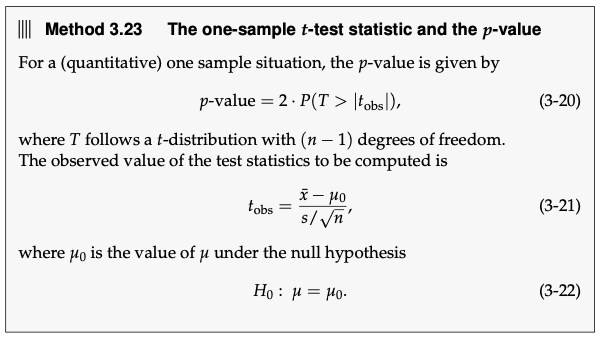

In [14]:
# method 3.23
n = len(samples)
mu_0 = 180
tobs = (np.mean(samples) - mu_0) / (np.std(samples, ddof=1) / np.sqrt(n))
print(f"tobs: {tobs}")

# the p-value is the probability of observing a
# test statistic as extreme as the one computed from the sample:
pvalue = 2 * (1 - stats.t.cdf(abs(tobs), df=n-1))
print(f"p-value: {pvalue}")

tobs: 2.085144140571199
p-value: 0.05455742828541599


In [15]:
# or with the built-in function
tobs, p_value = stats.ttest_1samp(samples, popmean=mu_0)
print(f"t-statistic: {tobs}\np-value: {p_value}")

t-statistic: 2.085144140571199
p-value: 0.05455742828541606


Weak evidence against $H_0$.

### **b) Critical Values for $\alpha=0.01$**

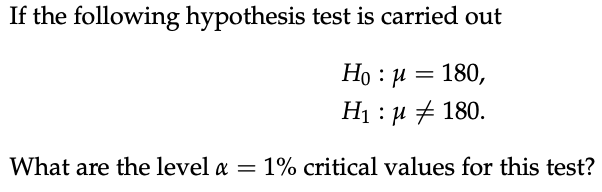

In [16]:
# the quantile is 1 - alpha/2, so we have
alpha = 0.01
quantile = 1 - alpha / 2
print(f"Quantile: {quantile}")

# the critical values would be plus minus t_0.995:
critical_value = stats.t.ppf(quantile, df=n-1)
print(f"Critical value (t_0.995): ±{critical_value}")

Quantile: 0.995
Critical value (t_0.995): ±2.9467128833386154


### **c) Confidence interval for $\mu$**

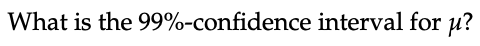

We use Method 3.9:

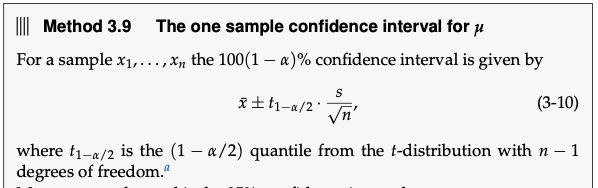

In [17]:
n = len(samples)
alpha = 0.01
t_quantile = stats.t.ppf(1 - alpha / 2, df=n - 1)

sample_mean = np.mean(samples)
sample_sd = np.std(samples, ddof=1)
confidence_interval = sample_mean + np.array([-1, 1]) * t_quantile * sample_sd / np.sqrt(n)
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: [179.97934031 180.12065969]


In [18]:
# or
(CI_low,CI_high) = stats.ttest_1samp(samples, popmean=0).confidence_interval(confidence_level=0.99)
print(f"99% CI: {CI_low,CI_high}")

99% CI: (179.9793403073197, 180.12065969268033)


### **d) Hypothesis testing**

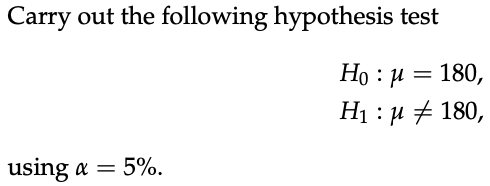

From exercise a, we know that $p=0.055$, so we cannot reject $H_0$.